<a href="https://colab.research.google.com/github/jasoonoo/pytorch/blob/main/DataLoading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### 1. Data loading
#### (1) Fashion-MNIST
* Fashion-MNIST는 10개 카테고리에서 70,000개의 패션 제품의 28x28 그레이스케일 이미지로 구성된 데이터 세트
* 카테고리당 7,000여개의 이미지
* 훈련 세트 : 60,000개, 테스트 세트: 10,000개

In [9]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [10]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

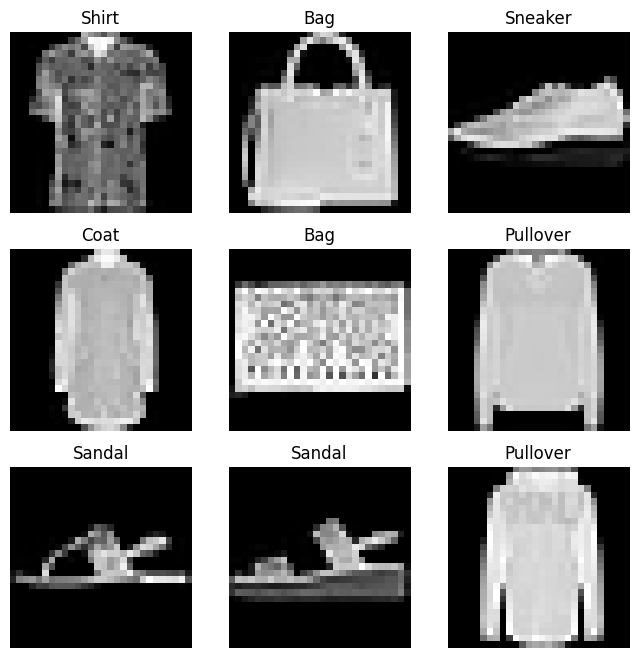

In [13]:
# 시각화

labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### (2) Cifar-10
* CIFAR-10 데이터넷은 Tiny Images 데이터셋의 하위 집합이며 60000개의 32x32 컬러 이미지로 구성
* 이미지는 10개의 상호 배타적인 클래스 중 하나로 표시되어 있습니다: 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
* 총 학습데이터 : 60000개의 이밎, 학습데이터: 50000개, 테스트 테이터: 10000개

In [14]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 170M/170M [00:05<00:00, 32.1MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


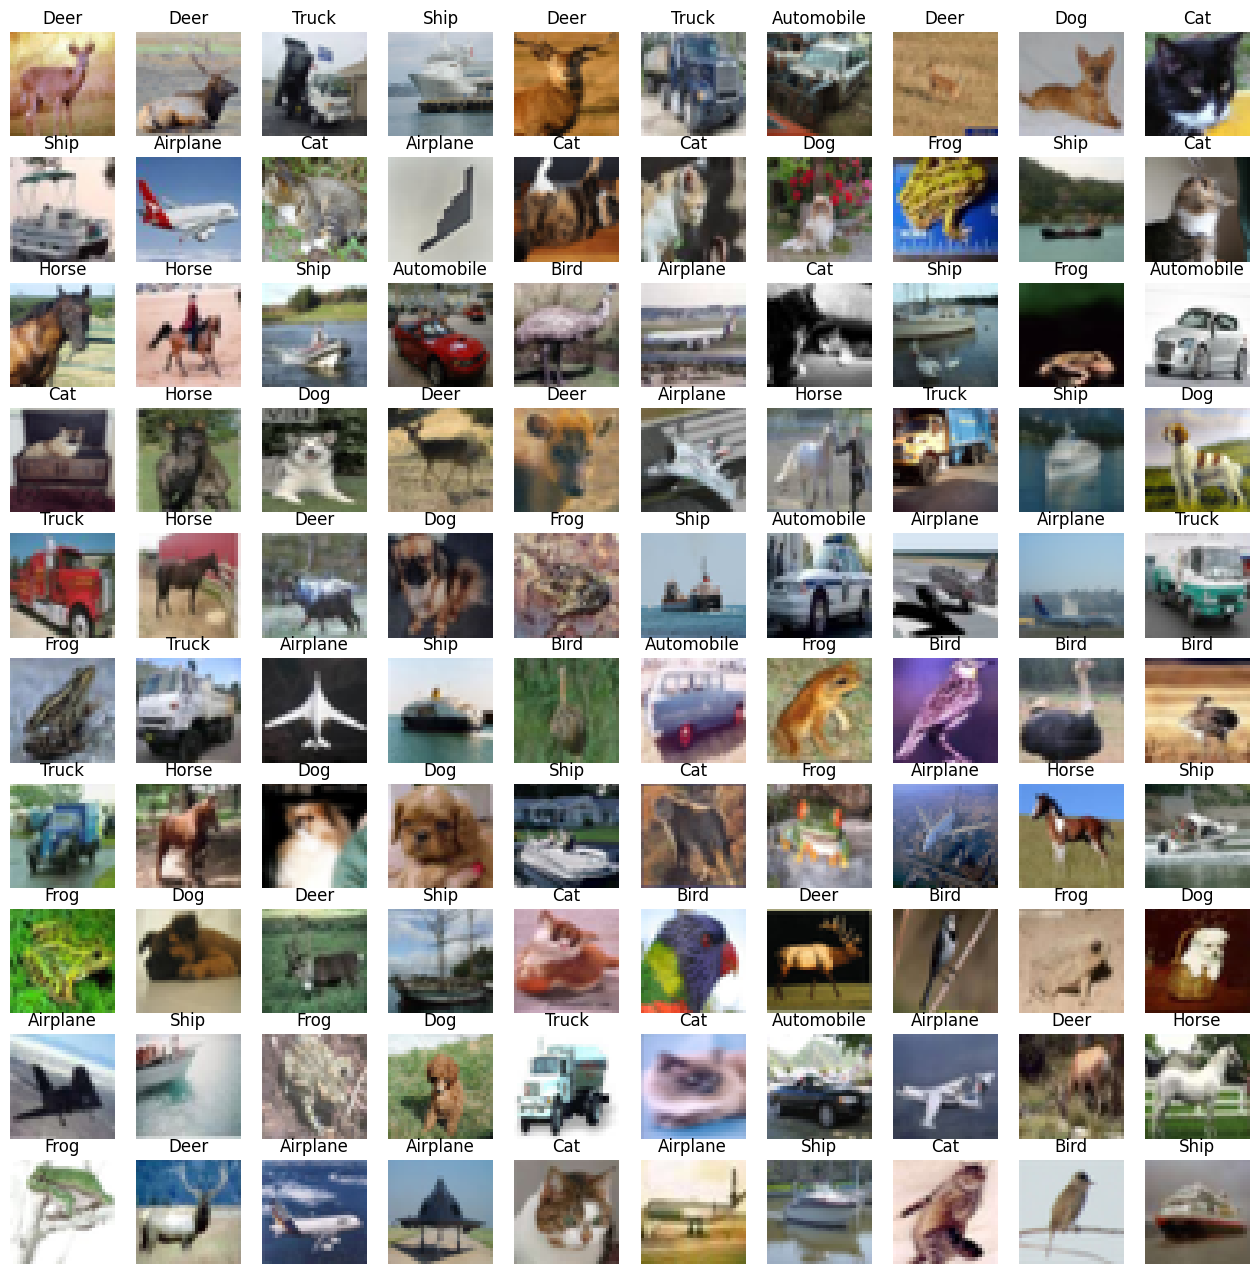

In [18]:
# 시각화

labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}

figure = plt.figure(figsize=(16,16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  # IMPORTANT!!
  # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
  img = img.permute(1,2,0)
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [19]:
len(train_data)

50000

####(3) CIFAR-100
* 100개의 클래스가 각각 600개의 이미지 포함
* 이미지 크기는 Cifar-10과 동일
* 각 클래스 별로 500개의 훈련 이미지와 100개의 테스트 이미지가 있음.
* CIFAR-100의 100개의 클래스는 20개의 슈퍼 클래스로 그룹화
* 각 이미지에는 "fine" 라벨과 "coarse" 라벨(그것이 속한 슈퍼클래스)이 함께 제공

In [20]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as f:
    dict = pickle.load(f, encoding='latin1')
  return dict

In [23]:
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 169M/169M [00:04<00:00, 40.8MB/s]


Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [24]:
# 시각화
meta_file = r'/content/data/cifar-100-python/meta'
meta_data = unpickle(meta_file)

print("Fine Label Names:", meta_data['fine_label_names'])
print("Coarse Label Names:", meta_data['coarse_label_names'])

Fine Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whal

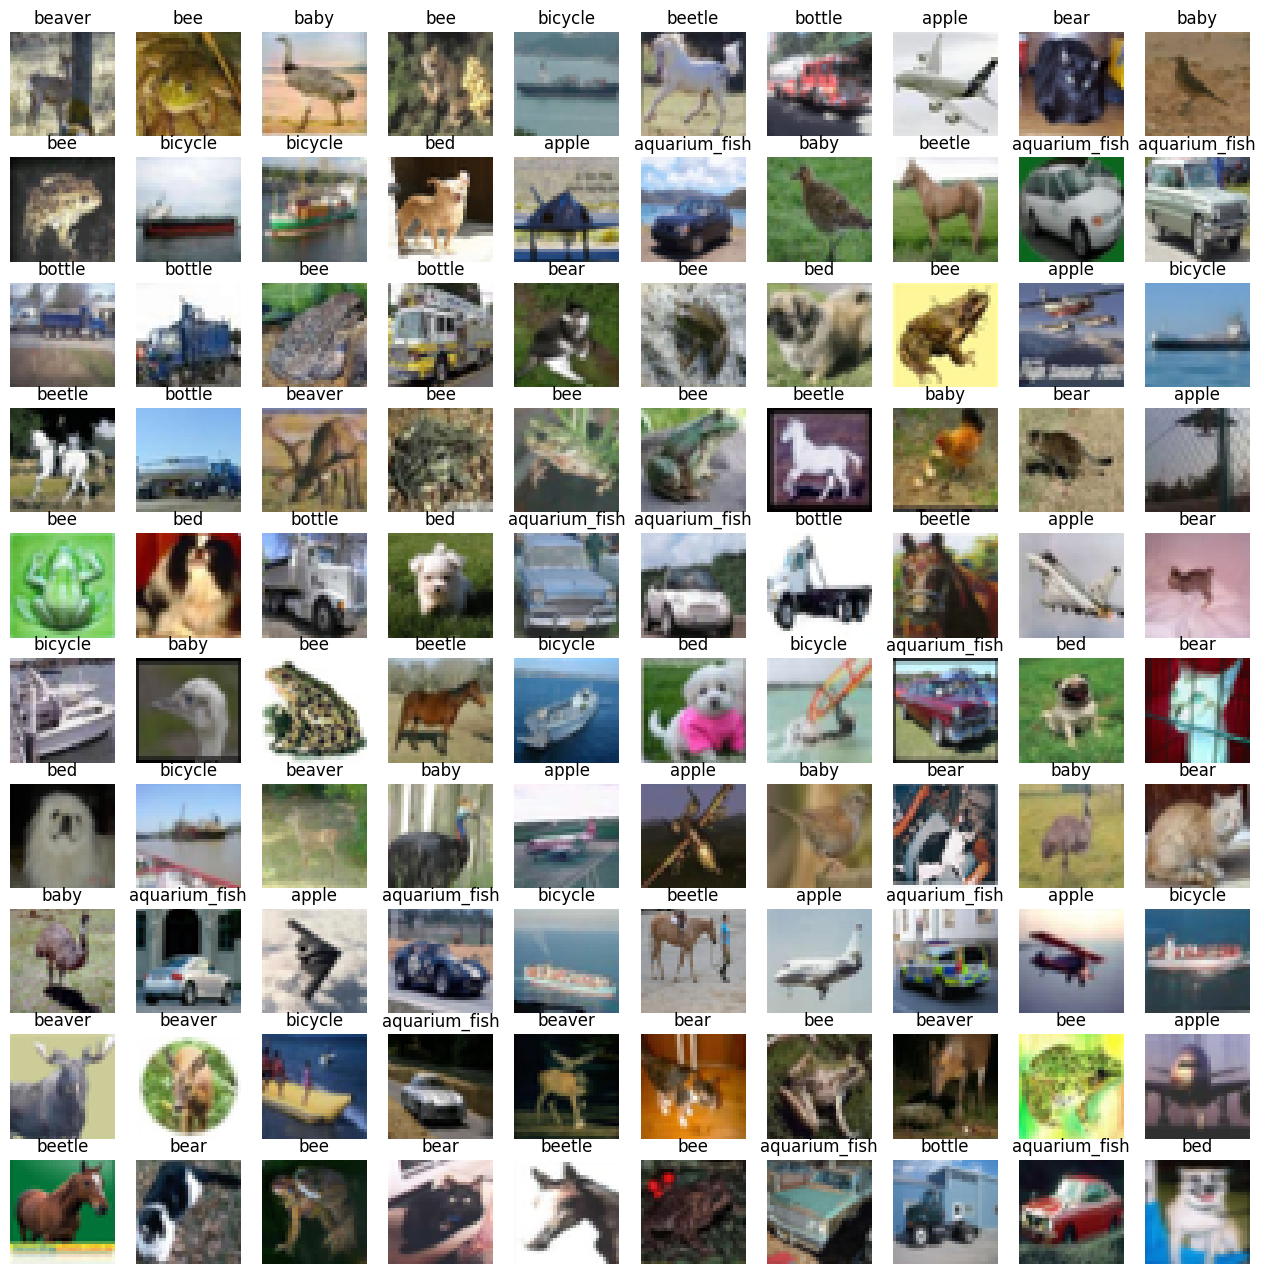

In [27]:
figure = plt.figure(figsize=(16,16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  # IMPORTANT!!
  # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
  img = img.permute(1,2,0)
  figure.add_subplot(rows, cols, i)
  plt.title(meta_data['fine_label_names'][label])
  plt.axis("off")
  plt.imshow(img)
plt.show()

In [30]:
type(training_data)

torchvision.datasets.cifar.CIFAR100

### 2. Dataset 만들기

In [33]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_lables)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.img_labels:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


In [34]:
import numpy as np

data = dict()
data['x'] = np.random.rand(1000, 32, 32,3)
data['y'] = np.random.randint(10, size=1000)

print(data['x'].shape)
print(data['y'].shape)



(1000, 32, 32, 3)
(1000,)


In [35]:
class MyDataset(Dataset):
  def __init__(self, raw_data, transform=None):
    self.x = torch.from_numpy(raw_data['x'])
    self.y = torch.from_numpy(raw_data['y'])
    self.transform = transform

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    print(idx)
    if self.transform:
      x = self.transform(self.x[idx])
    else:
      x = self.x[idx]
      y = self.y[idx]
    return x, y

In [37]:
my_dataset = MyDataset(data)
for x, y in my_dataset:
  print(x, y)
  print(x.shape)
  break

0
tensor([[[0.8261, 0.8861, 0.5825],
         [0.9130, 0.2789, 0.6142],
         [0.2479, 0.5985, 0.8766],
         ...,
         [0.6539, 0.2543, 0.1608],
         [0.8154, 0.7754, 0.9426],
         [0.3355, 0.0989, 0.2000]],

        [[0.2898, 0.0485, 0.6928],
         [0.7478, 0.4816, 0.3228],
         [0.8590, 0.0678, 0.3024],
         ...,
         [0.9554, 0.7918, 0.5823],
         [0.8658, 0.2770, 0.1972],
         [0.6343, 0.9727, 0.1220]],

        [[0.1831, 0.2537, 0.7876],
         [0.0689, 0.3694, 0.6063],
         [0.5504, 0.1512, 0.0193],
         ...,
         [0.7889, 0.0393, 0.1774],
         [0.5738, 0.1947, 0.4252],
         [0.2388, 0.4655, 0.2789]],

        ...,

        [[0.4622, 0.4951, 0.9665],
         [0.1969, 0.0816, 0.1353],
         [0.2006, 0.9518, 0.4781],
         ...,
         [0.0188, 0.7304, 0.4708],
         [0.9149, 0.7391, 0.0488],
         [0.2959, 0.0035, 0.0852]],

        [[0.0245, 0.3807, 0.0869],
         [0.3025, 0.0695, 0.2632],
         [

In [38]:
class MyDataset2(Dataset):
  def __init__(self, raw_data, transform=None):
    self.x = torch.from_numpy(raw_data['x'])
    self.y = torch.from_numpy(raw_data['y'])
    self.transform = transform

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    print(idx)
    if self.transform:
      x = self.transform(self.x[idx])
    else:
      x = self.x[idx]
      y = self.y[idx]
    return x, y, len(self.y)

In [40]:
my_dataset = MyDataset2(data)
for x, y,z in my_dataset:
  print(x, y)
  print(x.shape)
  print(z)
  break

0
tensor([[[0.8261, 0.8861, 0.5825],
         [0.9130, 0.2789, 0.6142],
         [0.2479, 0.5985, 0.8766],
         ...,
         [0.6539, 0.2543, 0.1608],
         [0.8154, 0.7754, 0.9426],
         [0.3355, 0.0989, 0.2000]],

        [[0.2898, 0.0485, 0.6928],
         [0.7478, 0.4816, 0.3228],
         [0.8590, 0.0678, 0.3024],
         ...,
         [0.9554, 0.7918, 0.5823],
         [0.8658, 0.2770, 0.1972],
         [0.6343, 0.9727, 0.1220]],

        [[0.1831, 0.2537, 0.7876],
         [0.0689, 0.3694, 0.6063],
         [0.5504, 0.1512, 0.0193],
         ...,
         [0.7889, 0.0393, 0.1774],
         [0.5738, 0.1947, 0.4252],
         [0.2388, 0.4655, 0.2789]],

        ...,

        [[0.4622, 0.4951, 0.9665],
         [0.1969, 0.0816, 0.1353],
         [0.2006, 0.9518, 0.4781],
         ...,
         [0.0188, 0.7304, 0.4708],
         [0.9149, 0.7391, 0.0488],
         [0.2959, 0.0035, 0.0852]],

        [[0.0245, 0.3807, 0.0869],
         [0.3025, 0.0695, 0.2632],
         [

#### (3) DataLoader

In [41]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


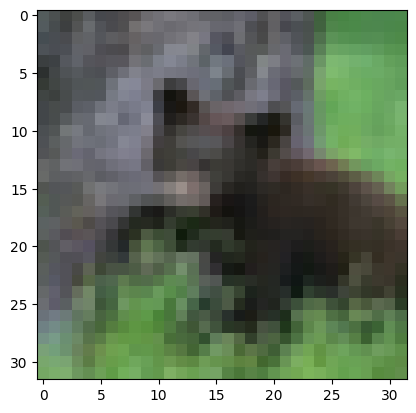

Label: bear


In [43]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

img = img.permute(1,2,0)
plt.imshow(img)
plt.show()

print(f"Label: {meta_data['fine_label_names'][label]}")



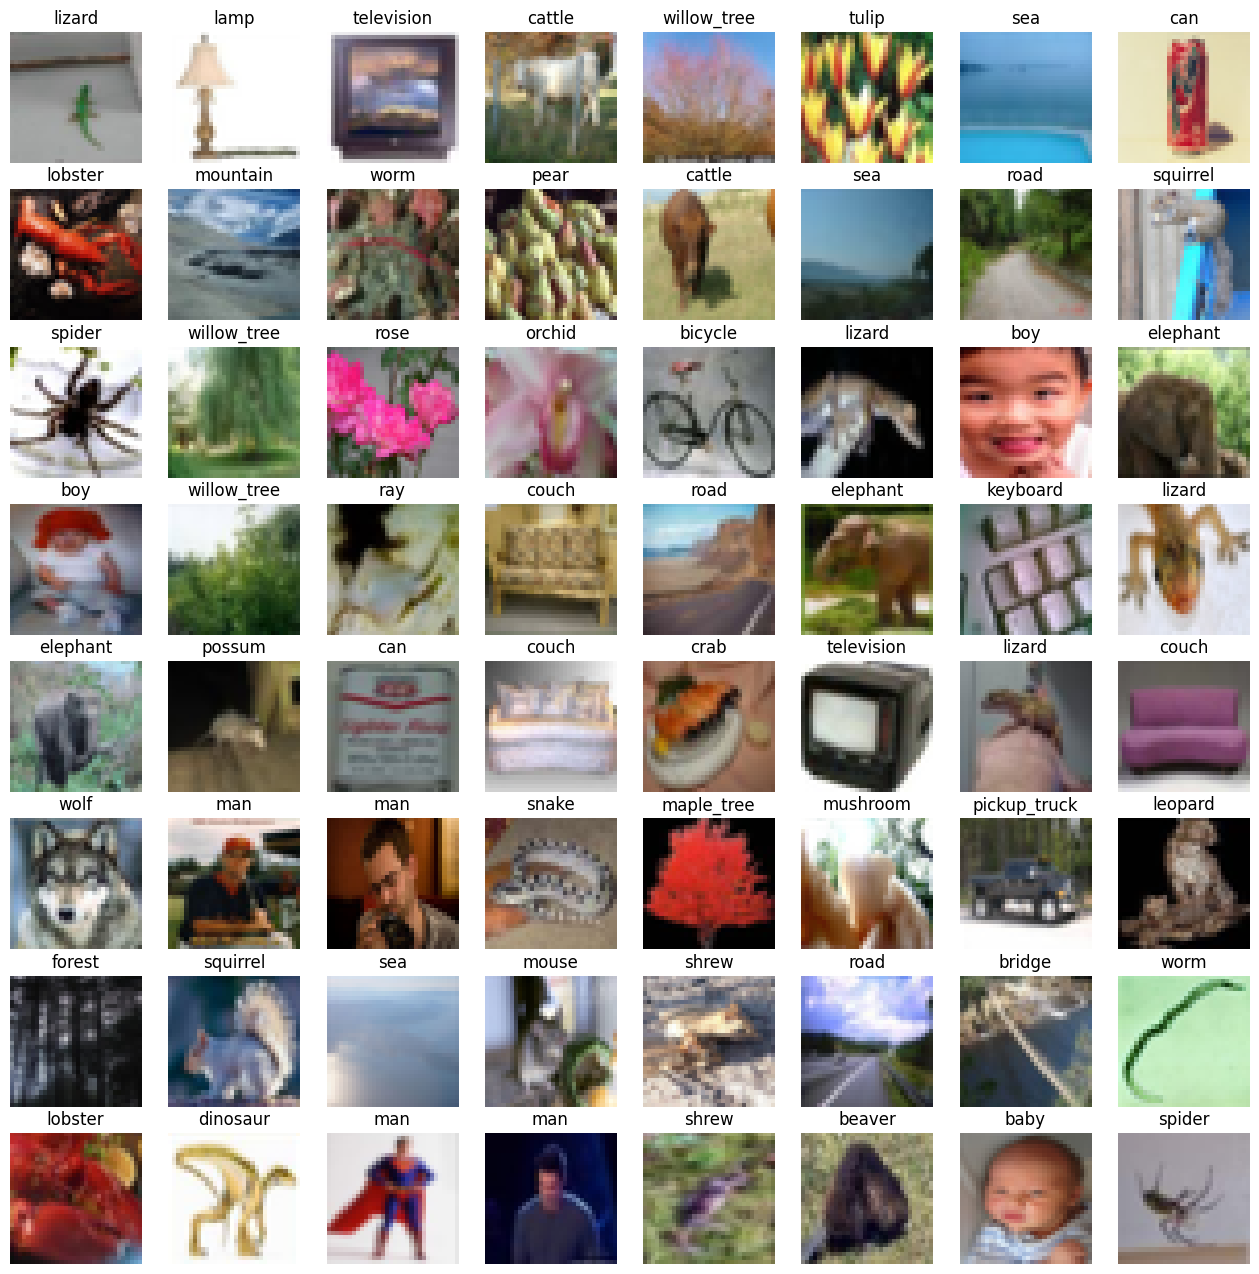

In [44]:
for features, labels in train_dataloader:
  figure = plt.figure(figsize=(16,16))
  cols, rows = 8,8
  for i in range(0, cols * rows):
    # IMPORTANT!!
    # PyTorch의 ToTensor transform은 channel first 방식임으로 채널을 마지막으로 배치해야 함
    img = features[i].permute(1,2,0)
    label = labels[i]
    figure.add_subplot(rows, cols, i+1)
    plt.title(meta_data['fine_label_names'][label])
    plt.axis("off")
    plt.imshow(img)
  plt.show()
  break

In [45]:
for x, y in train_dataloader:
  print(x.shape)
  print(y.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size